In [1]:
#from: https://github.com/iShkiper/DSP_24.M20_21/blob/main/%D0%9A%D0%BE%D0%B4/1.4%20FIR%20filters_on.ipynb

In [2]:
from scipy.io import wavfile

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, rfft, fftfreq
from scipy import signal

def plot_response(w, h, fs, title):
    plt.figure(figsize=(5,2))
    plt.plot(w, 10*np.log10(np.abs(h)))
    plt.ylim(-40, 5)
    plt.xlim(0, 0.5*fs)
    plt.grid(True)
    plt.xlabel('Частота')
    plt.ylabel('Амплитуда (дБ)')
    plt.title(title)

def myDFT_AmplPlot(t, x, N=512, fs = None, xLim = 0.5):    
    if len(x)>512:
        N = len(x)
        
    xFFT = fftshift(fft(x, N))
    # Амплитуда спектра
    xA = np.abs(xFFT)
    
    if fs == None:
        fs = 1    
    freqs = fftshift(fftfreq(N, d = 1/fs))
    # Графики
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.title('Сигнал')
    plt.plot(t, x)
    plt.xlabel('Временные отсчёты')

    plt.subplot(1, 2, 2)
    plt.plot(freqs,xA)
    plt.xlabel('Частоты')
    plt.xlim([0, fs*xLim])
    plt.xticks(np.linspace(0, fs*xLim, 11))
    plt.grid()
    plt.tight_layout()





In [3]:
fs, data = wavfile.read('source/LetsGo.wav')
data = data/np.max(data)
w = 500
t = np.arange(0,len(data)) / fs
noise = np.sin(2*np.pi*w*t)
y_noised = data + 0.75*noise

C:\Users\ufaba\AppData\Local\Temp\ipykernel_7452\3109597892.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('source/LetsGo.wav')


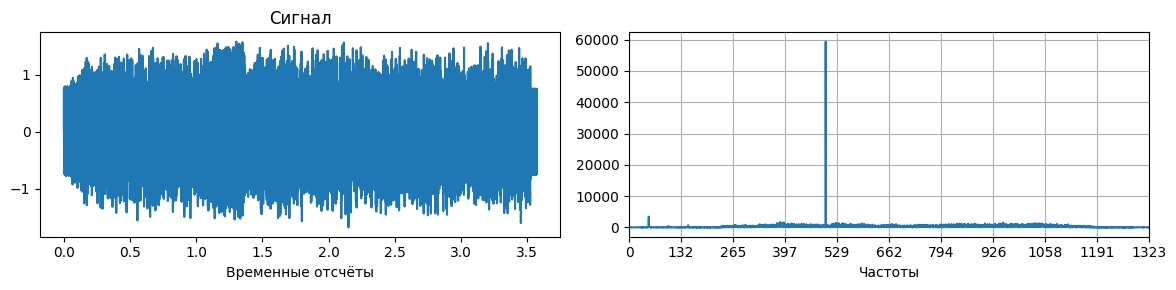

In [4]:
myDFT_AmplPlot(t, y_noised, fs = fs, xLim=0.03)

In [5]:
from scipy.signal import firwin, lfilter

bandwidth = 50    
nyq = fs / 2.0    



# Нормированные частоты заграждения
f1 = (w - bandwidth/2) / nyq
f2 = (w + bandwidth/2) / nyq

# Проектируем фильтр заграждения порядка M
M = 2401  # порядок фильтра
b = signal.firwin(M, [f1, f2], pass_zero=True)  # pass_zero=True — заграждающий

# Применение фильтра к зашумлённому сигналу
y_filtered = signal.lfilter(b, [1.0], y_noised)

ValueError: Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.

In [ ]:
# вывод АЧХ фильтра
ww, hh = signal.freqz(b, [1], fs=fs)
plot_response( ww, hh, fs, "Band-stop Filter")
plt.xlim(0, 0.45*fs)

In [ ]:
y_filt = lfilter(b, [1.0], y_noised) # фильтрация

In [ ]:
yFFT = np.abs(fft(y_filt))
dataFFT = np.abs(fft(data))
N = len(yFFT)
#sig = np.array([yFFT,dataFFT]).T
t= np.arange(N)*fs/N

plt.plot(t, yFFT, label='yFFT (filtered)')     
plt.plot(t, dataFFT, label='dataFFT (original)')  

#plt.plot(t,sig)
plt.legend()
plt.xlabel('Частоты')
plt.xlim([0, fs*0.05])